In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv


In [2]:
import pandas as pd
file_path = '/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv'
df = pd.read_csv(file_path)
# Show the coloumns
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# describe basic statistics of data
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


# Data Cleaning

In [5]:
df.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [6]:
# Handle missing values if any (in this case, there are none)
# df.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


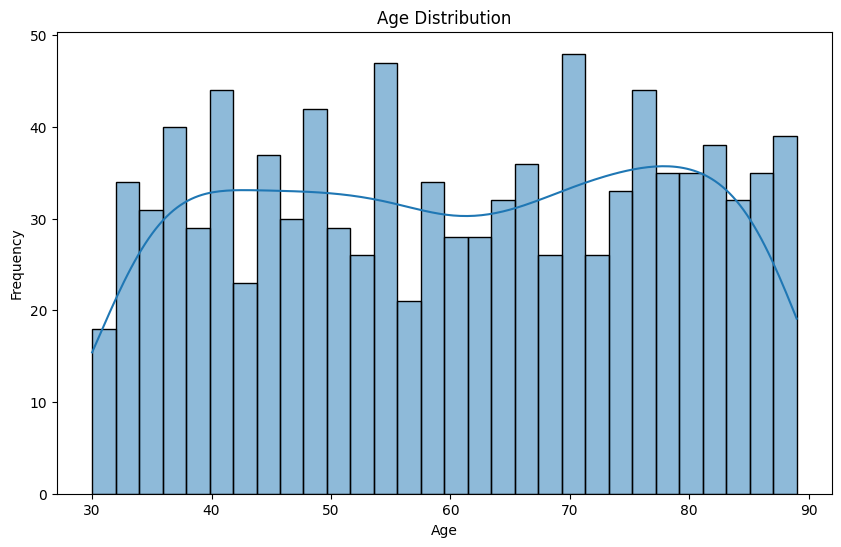

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

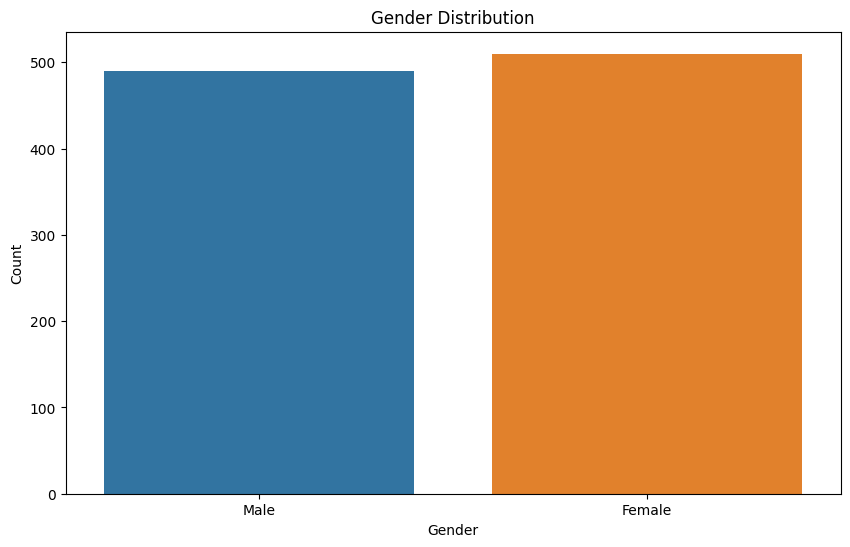

In [8]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

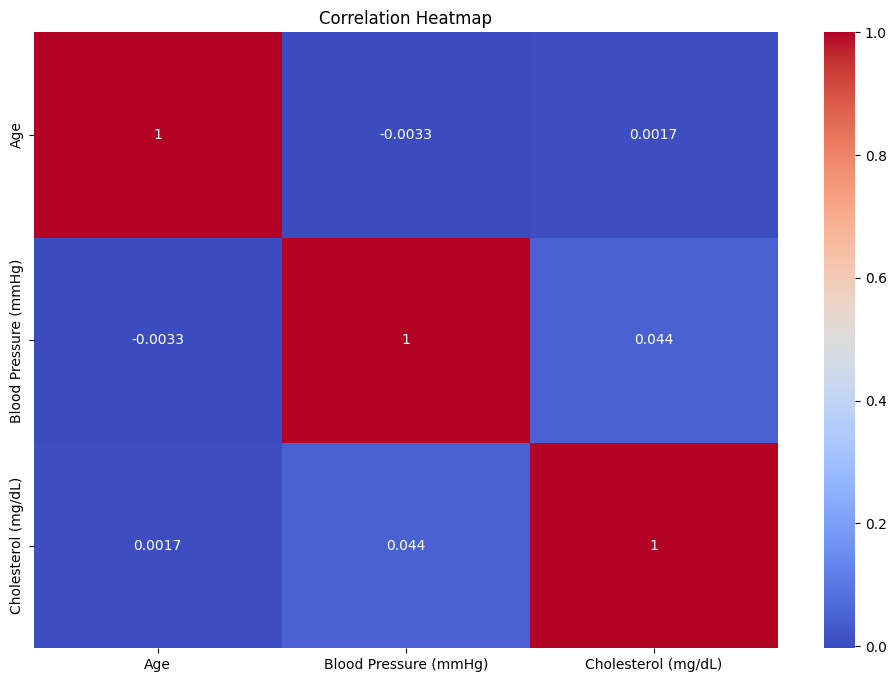

In [9]:
# Correlation heatmap for numeric values
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Encode

In [10]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,1,70,181,262,0,2,3,2
1,0,55,103,253,1,2,1,0
2,1,42,95,295,1,0,3,0
3,1,84,106,270,0,2,1,1
4,1,86,187,296,1,0,2,3


# Prediction Model

In [11]:
# Define features and target variable
X = df.drop('Treatment', axis=1)
y = df['Treatment']

# Split the data into training and testing sets.
#The data is split into training (70%) and testing (30%) sets using train_test_split. The random_state=42 ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
#A Random Forest model is initialized with a fixed random state for consistency.
#The model is trained (fitted) using the training data (X_train, y_train).
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on X_test
y_pred = model.predict(X_test)

# Evaluate the model
#accuracy: The overall accuracy of the model is calculated, which is the ratio of correctly predicted observations to the total observations.
#conf_matrix: The confusion matrix is generated to show the counts of true positives, false positives, true negatives, and false negatives.
#class_report: A classification report is generated, including metrics like precision, recall, and F1-score for each class.

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.2733333333333333,
 array([[17, 12, 27, 13],
        [20, 24, 19, 12],
        [18, 28, 23,  9],
        [17, 21, 22, 18]]),
 '              precision    recall  f1-score   support\n\n           0       0.24      0.25      0.24        69\n           1       0.28      0.32      0.30        75\n           2       0.25      0.29      0.27        78\n           3       0.35      0.23      0.28        78\n\n    accuracy                           0.27       300\n   macro avg       0.28      0.27      0.27       300\nweighted avg       0.28      0.27      0.27       300\n')

In [12]:
#Explored a dataset related to heart attacks, performed data cleaning, and built a prediction model for treatment types. The model's accuracy and other evaluation metrics provide insights into its performance.
#The accuracy of around 27% indicates that the model is performing poorly. 
#The Random Forest model might require tuning (e.g., adjusting hyperparameters) to improve performance.